# Bibliotecas usadas

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from tabulate import tabulate
import os
import geopandas as gpd
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from shapely.geometry import Point
import geopandas as gpd

# Lendo banco de dados

In [157]:
# Import the Excel file (m3/dia)
df = pd.read_excel('copasa.xlsx')

# Natureza dos dados

A natureza dos dados listados refere-se a diferentes aspectos de um conjunto de informações que inclui tipos variados de dados. O campo `Matricula` é um identificador numérico, representado como `int64`, que sugere que se trata de um número inteiro de 64 bits, ideal para grandes quantidades de dados. `Unidade`, `GR`, `Localidade`, `Situação`, `NOME 1`, e `Descritivo` são campos do tipo `object`, indicando que contêm informações textuais ou categóricas. Por exemplo, `Unidade` pode representar o nome de uma unidade ou departamento, enquanto `NOME 1` e `Descritivo` fornecem descrições ou nomes associados a registros específicos. O campo `100 MAIORES` é do tipo `float64`, sugerindo que armazena valores numéricos decimais de alta precisão, possivelmente representando uma métrica ou um ranking relacionado aos dados. Em resumo, esses tipos de dados combinam informações numéricas e textuais para formar um conjunto de dados complexo e diversificado.


In [158]:
#Analisar los tipos de datos que tengo en el data_frame
tipos_de_datos = df.dtypes
print(tipos_de_datos)

Matricula        int64
Unidade         object
GR              object
Localidade      object
Situação        object
NOME 1          object
Descritivo      object
100 MAIORES    float64
dtype: object


In [159]:
# Sumar todos los valores de la columna
suma_total = df['100 MAIORES'].sum()
print(f"La suma total de los valores en la columna 'columna_interes' es: {suma_total:.0f}(m3/dia)")

La suma total de los valores en la columna 'columna_interes' es: 11760(m3/dia)


# Análise Exploratória de Dados (EDA)

Análise Exploratória de Dados (EDA) é o processo inicial de análise que visa resumir as principais características dos dados através de técnicas estatísticas e visualizações. Seu objetivo é identificar padrões, detectar anomalias e verificar suposições antes de aplicar modelos mais complexos. EDA utiliza ferramentas como gráficos, tabelas e estatísticas descritivas para entender melhor a estrutura e as relações nos dados. É essencial para formular hipóteses e orientar a investigação subsequente.

In [160]:
# Contagem de valores nas colunas 'GR', 'Localidade' e 'Situação'
contador_1 = df.GR.value_counts(dropna=False)
contador_2 = df.Localidade.value_counts(dropna=False)
contador_3 = df.Situação.value_counts(dropna=False)

# Exibindo os resultados
print("Contagem de valores para 'GR':")
print(contador_1)
print("\n")

print("Contagem de valores para 'Localidade':")
print(contador_2)
print("\n")

print("Contagem de valores para 'Situação':")
print(contador_3)


Contagem de valores para 'GR':
GR
GRBS    48
GRCN    12
GRBO    11
GRBN    11
GRML     9
GRMS     6
GRMO     3
Name: count, dtype: int64


Contagem de valores para 'Localidade':
Localidade
BELO HORIZONTE        70
CONTAGEM              12
SANTA LUZIA            7
BETIM                  6
RIBEIRAO DAS NEVES     3
LAGOA SANTA            1
SABARA                 1
Name: count, dtype: int64


Contagem de valores para 'Situação':
Situação
COMERCIAL                 72
INDUSTRIAL                21
COMERCIAL E INDUSTRIAL     5
RESIDENCIAL/COMERCIAL      1
PÚBLICO                    1
Name: count, dtype: int64


# Analisis a GR - Tipo Global

O que cada categoria (GR) ?

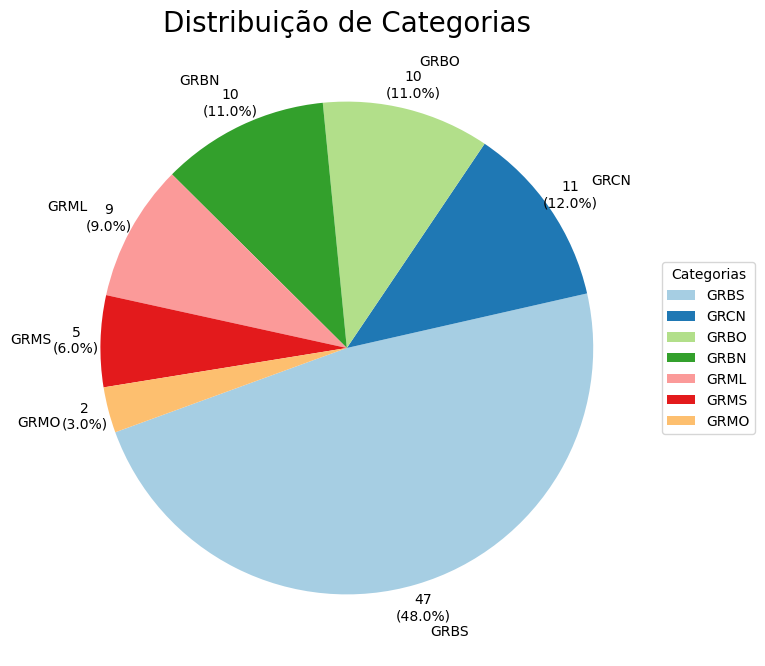

In [161]:
# Dados fornecidos
categorias = ['GRBS', 'GRCN', 'GRBO', 'GRBN', 'GRML', 'GRMS', 'GRMO']
conteos = [48, 12, 11, 11, 9, 6, 3]

def mostrar_porcentaje_y_conteo(pct, all_vals):
    total = sum(all_vals)
    valor = int(pct / 100. * total)
    return f'{valor}\n({pct:.1f}%)'

# Crear gráfico de torta
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura

# Graficar el gráfico de torta
wedges, texts, autotexts = plt.pie( 
    conteos,
    labels=categorias, 
    autopct=lambda pct: mostrar_porcentaje_y_conteo(pct, conteos),
    startangle=200, 
    colors=plt.cm.Paired(range(len(categorias))),
    wedgeprops=dict(width=1),  # Crear un gráfico de torta en forma de donut
    pctdistance=1.1,            # Distancia del texto de porcentaje desde el centro
    labeldistance=1.2,
    textprops={'fontsize': 10})   

# Personalizar gráfico
plt.title('Distribuição de Categorias',fontsize=20)

# Añadir leyenda
plt.legend(
    wedges, 
    categorias, 
    title="Categorias", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Mostrar gráfico
plt.show()


# Análise da "localidade" (Prefeitura) -Tipo Global

### Localidades na Região Metropolitana de Belo Horizonte

1. **BELO HORIZONTE**: A capital do estado de Minas Gerais e o centro econômico e cultural da região.
2. **CONTAGEM**: Uma cidade vizinha a Belo Horizonte, conhecida por sua importância industrial e comercial.
3. **SANTA LUZIA**: Uma cidade localizada na região metropolitana de Belo Horizonte, com um caráter histórico e residencial.
4. **BETIM**: Uma cidade industrial situada a oeste de Belo Horizonte, conhecida por seu desenvolvimento econômico.
5. **RIBEIRÃO DAS NEVES**: Uma cidade na região metropolitana, conhecida por sua diversidade cultural e crescimento populacional.
6. **LAGOA SANTA**: Uma cidade famosa por suas lagoas e como um destino turístico e histórico, localizada ao norte de Belo Horizonte.
7. **SABARA**: Uma cidade histórica e turística, situada a leste de Belo Horizonte, conhecida por seu patrimônio cultural.


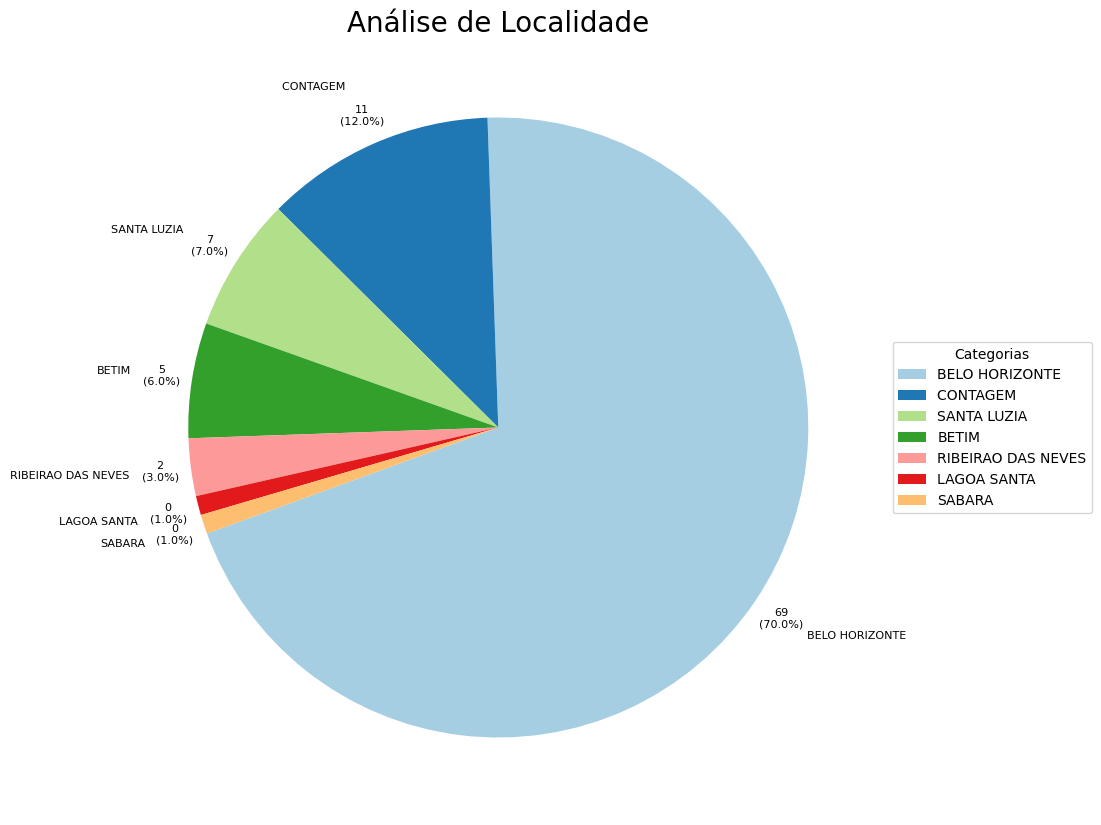

In [162]:
# Datos proporcionados
categorias = ['BELO HORIZONTE', 'CONTAGEM ', 'SANTA LUZIA', 'BETIM', 'RIBEIRAO DAS NEVES', 'LAGOA SANTA', 'SABARA']

conteos = [70, 12, 7, 6, 3, 1, 1]

# Función personalizada para mostrar porcentaje y conteo
def mostrar_porcentaje_y_conteo(pct, all_vals):
    total = sum(all_vals)
    valor = int(pct / 100. * total)
    return f'{valor}\n({pct:.1f}%)'

# Crear gráfico de torta
plt.figure(figsize=(10, 25))  # Ajustar el tamaño de la figura

# Graficar el gráfico de torta
wedges, texts, autotexts = plt.pie( 
    conteos,
    labels=categorias, 
    autopct=lambda pct: mostrar_porcentaje_y_conteo(pct, conteos),
    startangle=200, 
    colors=plt.cm.Paired(range(len(categorias))),
    wedgeprops=dict(width=1),  # Crear un gráfico de torta en forma de donut
    pctdistance=1.1,            # Distancia del texto de porcentaje desde el centro
    labeldistance=1.2,
    textprops={'fontsize': 8})   

# Personalizar gráfico
plt.title('Análise de Localidade', fontsize=20)

# Añadir leyenda
plt.legend(
    wedges, 
    categorias, 
    title="Categorias", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Mostrar gráfico
plt.show()

# Analisis a "Situacao" - Tipo Global

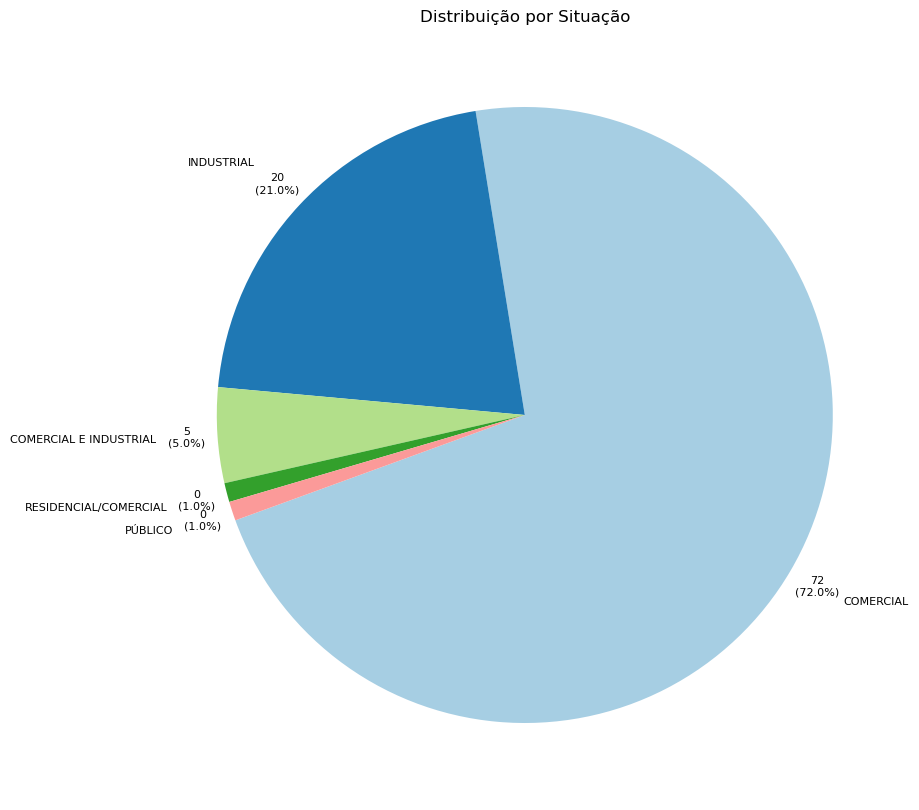

In [163]:
# Dados fornecidos
categorias = ['COMERCIAL', 'INDUSTRIAL', 'COMERCIAL E INDUSTRIAL', 'RESIDENCIAL/COMERCIAL', 'PÚBLICO']
conteos = [72, 21, 5, 1, 1]

# Função personalizada para mostrar percentual e contagem
def mostrar_porcentaje_y_conteo(pct, all_vals):
    total = sum(all_vals)
    valor = int(pct / 100. * total)
    return f'{valor}\n({pct:.1f}%)'

# Crear gráfico de torta
plt.figure(figsize=(10, 10))  # Aumentar el tamaño de la figura
plt.pie(conteos, 
        labels=categorias, 
        autopct=lambda pct: mostrar_porcentaje_y_conteo(pct, conteos),
        startangle=200, 
        colors=plt.cm.Paired(range(len(categorias))),
        wedgeprops=dict(width=1),  # Crear un gráfico de torta en forma de donut
        pctdistance=1.1,            # Distancia del texto de porcentaje desde el centro
        labeldistance=1.2,
        textprops={'fontsize': 8})               # Distância das etiquetas do centro

# Personalizar gráfico
plt.title('Distribuição por Situação')

# Mostrar gráfico
plt.show()

# Analisis a "Vazao" - Tipo Global

## Copiando o banco de dados

In [164]:
df_vazao = df.copy()

df_vazao = df_vazao[['100 MAIORES']]

# Encontrar el valor máximo en la columna '100 MAIORES'
valor_maximo = df_vazao['100 MAIORES'].max()

print("El valor máximo en la columna '100 MAIORES' es:", valor_maximo)

El valor máximo en la columna '100 MAIORES' es: 1322.7956989247311


## Resumo Estatístico Básico

### Resumo Estatístico Básico da Coluna '100 MAIORES (vazao)':

- **Contagem (count)**: 100 registros
- **Média (mean)**: 117.60
- **Desvio Padrão (std)**: 173.95
- **Valor Mínimo (min)**: 46.90
- **25º Percentil (25%)**: 58.27
- **50º Percentil (50%)**: 71.66 (mediana)
- **75º Percentil (75%)**: 102.07
- **Valor Máximo (max)**: 1322.80

Essas estatísticas ajudam a entender a distribuição e a variabilidade dos valores na coluna analisada. Para a consideração das análises de vazão, será utilizada a unidade de medida [m³/dia].

In [165]:
# Resumen estadístico básico
resumen_estadistico = df_vazao['100 MAIORES'].describe()
print("Resumen Estadístico Básico:")
print(resumen_estadistico)

Resumen Estadístico Básico:
count     100.000000
mean      117.599781
std       173.946916
min        46.900538
25%        58.269489
50%        71.663965
75%       102.066532
max      1322.795699
Name: 100 MAIORES, dtype: float64


# Análise de Frequências Acumuladas: Maior a Menor

Nesta seção, vamos analisar a frequência acumulada dos dados de vazão para as 100 maiores empresas, ordenando os valores de maior para menor. A frequência acumulada é uma medida que nos permite observar como os valores se acumulam ao longo da lista, desde o maior valor até o menor.

### Passos para a Análise:

1. **Ordenação dos Dados**:
   - Os dados são inicialmente ordenados de forma decrescente com base na coluna '100 MAIORES'. Isto significa que o maior valor de vazão será listado primeiro e o menor valor estará por último.

2. **Cálculo da Vazão Acumulada**:
   - Após ordenar os dados, calculamos a vazão acumulada. A vazão acumulada é a soma dos valores de vazão até o ponto atual na lista ordenada. Por exemplo, para o primeiro item na lista, a vazão acumulada é igual ao valor de vazão desse item. Para o segundo item, a vazão acumulada é a soma dos valores de vazão do primeiro e segundo itens, e assim por diante.

3. **Visualização Gráfica**:
   - O gráfico resultante mostra como a vazão acumulada cresce à medida que incluímos mais empresas na lista, começando pela empresa com a maior vazão. Isso nos ajuda a visualizar rapidamente a contribuição de cada empresa para o total acumulado de vazão.

4. **Interpretação da Linha de Vazão Simulada**:
   - Adicionamos uma linha horizontal no gráfico para representar um valor de vazão simulada (por exemplo, 3600 m³/dia). Esta linha permite comparar visualmente como a vazão acumulada das empresas se compara com o valor simulado.

### Objetivo da Análise

O objetivo desta análise é entender a distribuição da vazão acumulada entre as empresas e como ela se acumula desde a maior vazão até a menor. Isso pode ajudar a identificar a importância relativa das maiores empresas no total acumulado e avaliar o impacto de valores simulados em comparação com a distribuição real.

Com essa abordagem, podemos obter uma visão clara de como a vazão é distribuída e acumulada entre as diferentes empresas e como a nossa vazão simulada se encaixa nesse contexto.

## Vazao Simulada de tratamento 

Vamos considerar uma situação hipotética para avaliar a capacidade nominal de tratamento de dados. Suponhamos que desejamos determinar a quantidade de metros cúbicos por dia que seríamos capazes de tratar para diferentes empresas. Para isso, analisaremos os dados disponíveis e aplicaremos um tratamento proposto para estimar a capacidade efetiva de processamento. Ajustaremos os valores conforme as necessidades específicas de cada empresa e os compararemos com as estatísticas descritivas fornecidas. Esse exercício ajudará a entender melhor a viabilidade do tratamento proposto em termos práticos.

In [166]:
vazao_simulada_1=1000

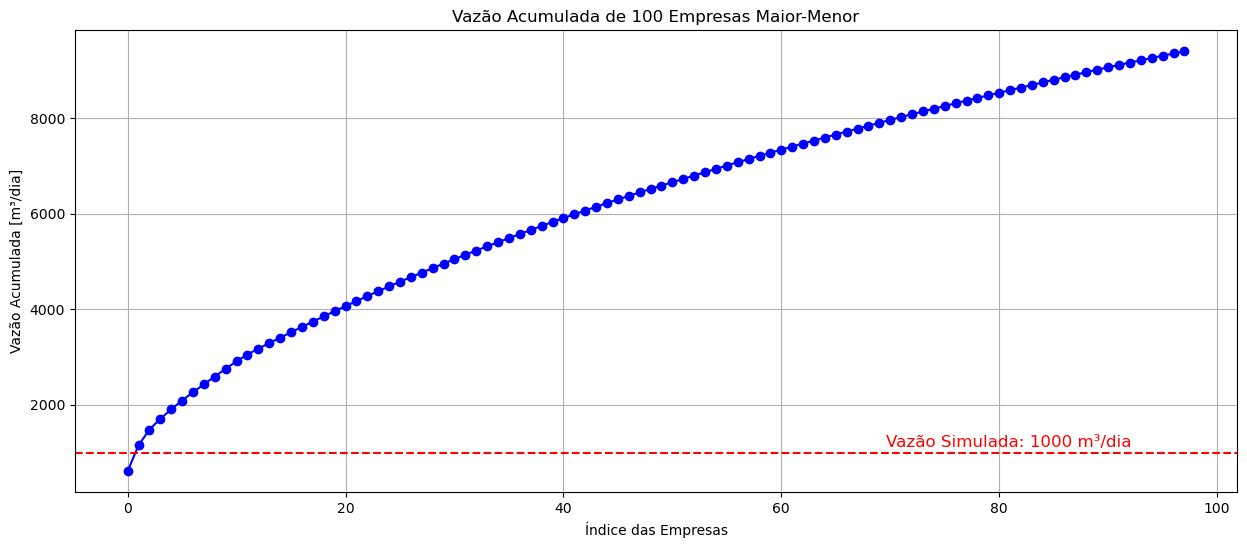


Tabela de Vazão Acumulada:
+----------+---------+-------------------+
|   Índice |   Vazão |   Vazão Acumulada |
+==========+=========+===================+
|        0 |     609 |               609 |
+----------+---------+-------------------+
|        1 |     542 |              1151 |
+----------+---------+-------------------+
|        2 |     329 |              1480 |
+----------+---------+-------------------+
|        3 |     226 |              1707 |
+----------+---------+-------------------+
|        4 |     196 |              1904 |
+----------+---------+-------------------+
|        5 |     185 |              2089 |
+----------+---------+-------------------+
|        6 |     172 |              2261 |
+----------+---------+-------------------+
|        7 |     165 |              2427 |
+----------+---------+-------------------+
|        8 |     164 |              2591 |
+----------+---------+-------------------+
|        9 |     162 |              2753 |
+----------+---------+----

In [167]:
# Eliminar los dos primeros valores (Muito grandes)
df = df.iloc[2:].reset_index(drop=True)

# Ordenar los datos de mayor a menor
df_sorted = df.sort_values(by='100 MAIORES', ascending=False)

# Calcular la vazão acumulada
df_sorted['Vazão Acumulada'] = df_sorted['100 MAIORES'].cumsum()

# Crear el gráfico de vazão acumulada
fig, ax = plt.subplots(figsize=(15, 6))

# Graficar la vazão acumulada
ax.plot(df_sorted.index, df_sorted['Vazão Acumulada'], marker='o', linestyle='-', color='b')

# Añadir una línea roja en la vazão simulada
ax.axhline(y=vazao_simulada_1, color='red', linestyle='--')

# Añadir texto para la vazão simulada en la parte superior derecha
ax.text(
    x=df_sorted.index.max() * 0.95,  # Ubicación horizontal del texto (ajustar si es necesario)
    y=vazao_simulada_1 * 1.05,       # Ubicación vertical del texto (aumentar el valor para elevarlo)
    s=f'Vazão Simulada: {vazao_simulada_1} m³/dia',  # Texto a mostrar
    color='red',                     # Color del texto
    ha='right',                      # Alineación horizontal del texto
    va='bottom',                     # Alineación vertical del texto (se cambia a 'bottom')
    fontsize=12                      # Tamaño de la fuente
)


# Configurar el título y etiquetas del gráfico
ax.set_xlabel('Índice das Empresas')
ax.set_ylabel('Vazão Acumulada [m³/dia]')
ax.set_title('Vazão Acumulada de 100 Empresas Maior-Menor')
ax.grid(True)

# Mostrar el gráfico
plt.show()

# Crear la tabla usando tabulate
table_data = df_sorted[['100 MAIORES', 'Vazão Acumulada']].reset_index()
table_data.columns = ['Índice', 'Vazão', 'Vazão Acumulada']


# Ahora puedes convertir a enteros sin problemas
table_data['Vazão'] = table_data['Vazão'].astype(int)
table_data['Vazão Acumulada'] = table_data['Vazão Acumulada'].astype(int)


# Ajustar el índice para que comience en 1
table_data.index = table_data.index + 1

# Imprimir la tabla en formato texto con sólo 3 columnas
print("\nTabela de Vazão Acumulada:")
print(tabulate(table_data[['Índice', 'Vazão', 'Vazão Acumulada']], headers='keys', tablefmt='grid', showindex=False))


Com as 2 maiores empresas, poderíamos avaliar se seríamos capazes de atender à vazão esperada. Utilizando os dados dessas empresas, podemos estimar a capacidade total de tratamento e comparar com a demanda projetada. Isso nos permitirá verificar se a capacidade agregada dessas empresas é suficiente para cobrir a vazão necessária, ajudando a garantir que os recursos estejam adequados para atender à demanda esperada.

# Análise de frequências acumuladas: Menor a Maior  

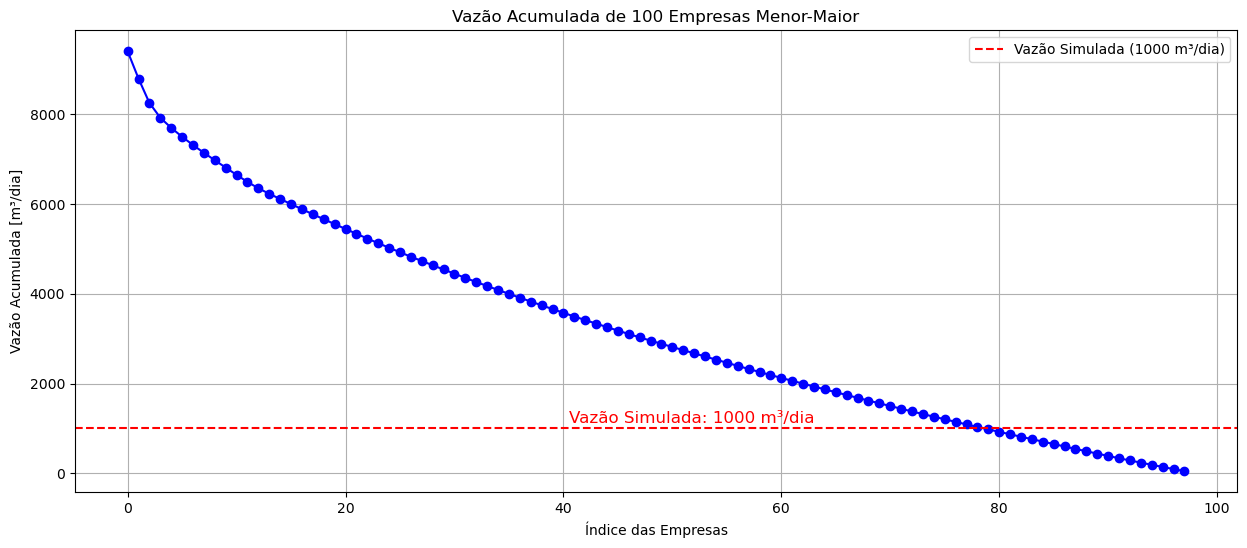


Tabela de Vazão Acumulada:
+----------+---------+-------------------+
|   Índice |   Vazão |   Vazão Acumulada |
+==========+=========+===================+
|       97 |      46 |                46 |
+----------+---------+-------------------+
|       96 |      47 |                94 |
+----------+---------+-------------------+
|       95 |      47 |               141 |
+----------+---------+-------------------+
|       94 |      47 |               189 |
+----------+---------+-------------------+
|       93 |      48 |               238 |
+----------+---------+-------------------+
|       92 |      48 |               286 |
+----------+---------+-------------------+
|       91 |      49 |               335 |
+----------+---------+-------------------+
|       90 |      51 |               387 |
+----------+---------+-------------------+
|       89 |      51 |               439 |
+----------+---------+-------------------+
|       88 |      52 |               491 |
+----------+---------+----

In [168]:
# Supongamos que ya tienes tu DataFrame df con la columna '100 MAIORES'
# Definir la vazão simulada
vazao_simulada_1 = 1000

# Ordenar los datos de menor a mayor
df_sorted = df.sort_values(by='100 MAIORES', ascending=True)

# Calcular la vazão acumulada
df_sorted['Vazão Acumulada'] = df_sorted['100 MAIORES'].cumsum()

# Crear el gráfico de vazão acumulada
fig, ax = plt.subplots(figsize=(15, 6))

# Graficar la vazão acumulada
ax.plot(df_sorted.index, df_sorted['Vazão Acumulada'], marker='o', linestyle='-', color='b')

# Añadir una línea roja en la vazão simulada
ax.axhline(y=vazao_simulada_1, color='red', linestyle='--', label=f'Vazão Simulada ({vazao_simulada_1} m³/dia)')

# Añadir texto para la vazão simulada en la parte superior derecha
ax.text(
    x=df_sorted.index.max() * 0.65,  # Ubicación horizontal del texto (ajustar si es necesario)
    y=vazao_simulada_1 * 1.05,       # Ubicación vertical del texto (aumentar el valor para elevarlo)
    s=f'Vazão Simulada: {vazao_simulada_1} m³/dia',  # Texto a mostrar
    color='red',                     # Color del texto
    ha='right',                      # Alineación horizontal del texto
    va='bottom',                     # Alineación vertical del texto
    fontsize=12                      # Tamaño de la fuente
)

# Configurar el título y etiquetas del gráfico
ax.set_xlabel('Índice das Empresas')
ax.set_ylabel('Vazão Acumulada [m³/dia]')
ax.set_title('Vazão Acumulada de 100 Empresas Menor-Maior')
ax.grid(True)
ax.legend()

# Mostrar el gráfico
plt.show()

# Crear la tabla usando tabulate
table_data = df_sorted[['100 MAIORES', 'Vazão Acumulada']].reset_index()
table_data.columns = ['Índice', 'Vazão', 'Vazão Acumulada']

# Convertir los valores a enteros
table_data['Vazão'] = table_data['Vazão'].astype(int)
table_data['Vazão Acumulada'] = table_data['Vazão Acumulada'].astype(int)

# Ajustar el índice para que comience en 1
table_data.index = table_data.index + 1

# Imprimir la tabla en formato texto con sólo 3 columnas
print("\nTabela de Vazão Acumulada:")
print(tabulate(table_data[['Índice', 'Vazão', 'Vazão Acumulada']], headers='keys', tablefmt='grid', showindex=False))


Com as 20 menores empresas, poderíamos avaliar se seríamos capazes de atender à vazão esperada. Utilizando os dados dessas empresas, podemos estimar a capacidade total de tratamento e comparar com a demanda projetada. Isso nos permitirá verificar se a capacidade agregada dessas empresas é suficiente para cobrir a vazão necessária, ajudando a garantir que os recursos estejam adequados para atender à demanda esperada.

# Estatísticas Adicionais : Histograma, boxplot

### 1. **Histograma com KDE (Kernel Density Estimation)**

- **Histograma**: Mostra a distribuição dos dados em intervalos ou "bins". Ajuda a visualizar a frequência dos dados em diferentes faixas.
- **KDE**: Adiciona uma curva de densidade suavizada sobre o histograma, fornecendo uma estimativa contínua da distribuição dos dados.

### 2. **Assimetria (Skewness)**

- **Assimetria**: Mede o grau de simetria da distribuição dos dados. 
  - **Assimetria positiva** (maior que 0): A cauda direita é mais longa ou mais pesada do que a cauda esquerda. A distribuição está inclinada para a direita.
  - **Assimetria negativa** (menor que 0): A cauda esquerda é mais longa ou mais pesada do que a cauda direita. A distribuição está inclinada para a esquerda.
  - **Assimetria próxima a 0**: A distribuição é aproximadamente simétrica.

### 3. **Curtose (Kurtosis)**

- **Curtose**: Mede a "altitude" da distribuição dos dados em comparação com uma distribuição normal.
  - **Curtose positiva**: Indica caudas mais pesadas e uma distribuição com picos mais altos do que a normal. Os dados têm mais probabilidade de estar nos extremos.
  - **Curtose negativa**: Indica caudas mais leves e uma distribuição mais achatada. Os dados tendem a estar mais distribuídos no centro.
  - **Curtose próxima a 0**: A distribuição tem uma forma semelhante à distribuição normal.

Esses gráficos e estatísticas ajudam a entender como seus dados estão distribuídos, se há inclinações na distribuição e se os dados têm caudas mais pronunciadas ou mais suaves do que uma distribuição normal.

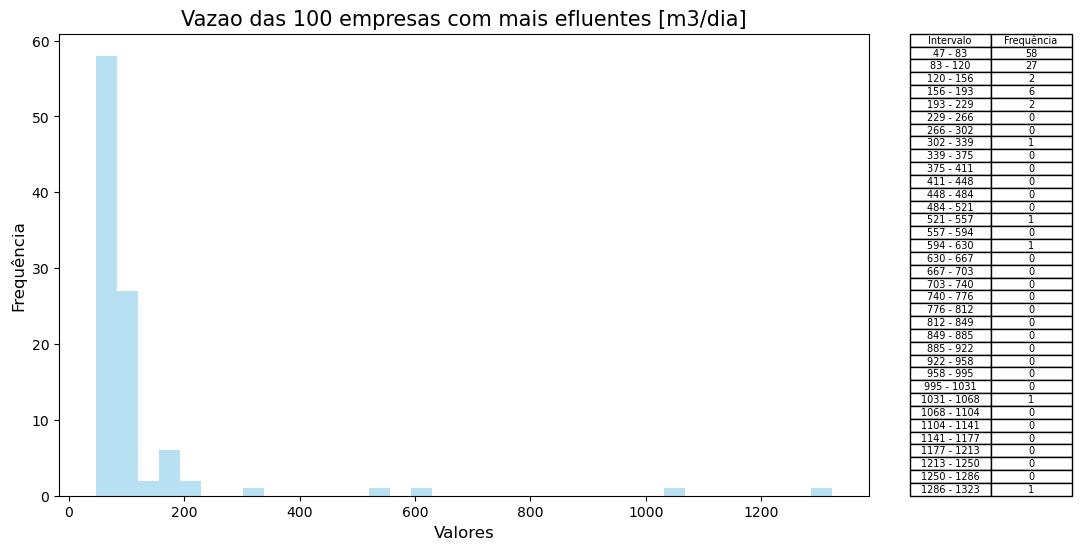

In [169]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Histograma
hist_data = ax.hist(df_vazao['100 MAIORES'], bins=35, color='skyblue', alpha=0.6)

# Crear una tabla con los valores del histograma y redondear los números
table_data = pd.DataFrame({
    'Intervalo': [f'{x:.0f} - {y:.0f}' for x, y in zip(hist_data[1][:-1], hist_data[1][1:])],
    'Frequência': hist_data[0].astype(int)  # Convertir a entero para eliminar decimales
})

# Agregar la tabla al gráfico
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='right',
                  bbox=[1.05, 0, 0.2, 1])  # Ajusta bbox para posicionar la tabla

# Configurar el título y etiquetas del gráfico
ax.set_title('Vazao das 100 empresas com mais efluentes [m3/dia]', fontsize=15)
ax.set_xlabel('Valores', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)

# Ajustar el diseño para que no se solapen
plt.subplots_adjust(right=0.8)

# Mostrar el gráfico y la tabla
plt.show()


c:\Users\felip\.conda\envs\copasa_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


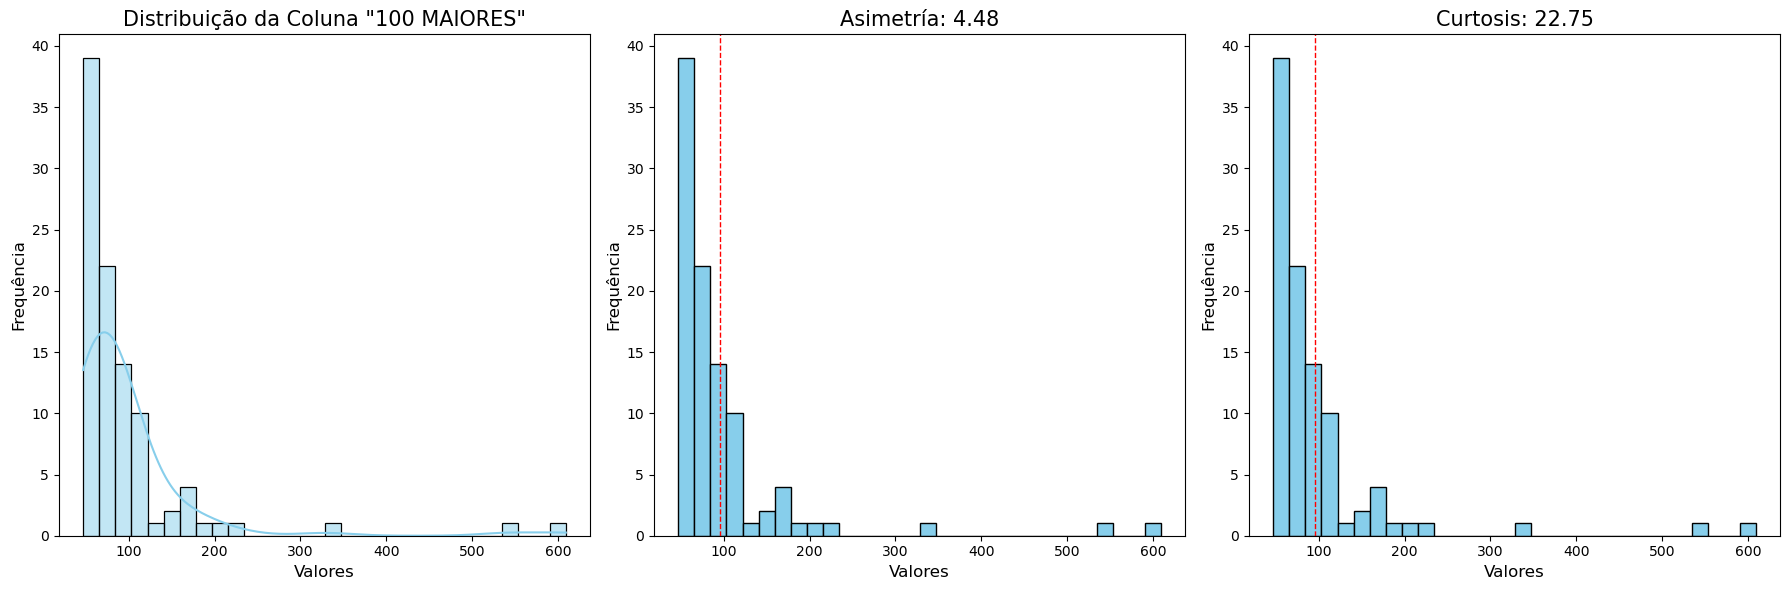

In [170]:
# Suponiendo que df es tu DataFrame y '100 MAIORES' es la columna de interés

# Calcular estadísticas
asimetria = skew(df['100 MAIORES'])
curtosis = kurtosis(df['100 MAIORES'])

# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histograma con KDE
sns.histplot(df['100 MAIORES'], kde=True, bins=30, color='skyblue', ax=axs[0])
axs[0].set_title('Distribuição da Coluna "100 MAIORES"', fontsize=15)
axs[0].set_xlabel('Valores', fontsize=12)
axs[0].set_ylabel('Frequência', fontsize=12)

# Asimetría
axs[1].hist(df['100 MAIORES'], bins=30, color='skyblue', edgecolor='black')
axs[1].set_title(f'Asimetría: {asimetria:.2f}', fontsize=15)
axs[1].set_xlabel('Valores', fontsize=12)
axs[1].set_ylabel('Frequência', fontsize=12)
axs[1].axvline(df['100 MAIORES'].mean(), color='red', linestyle='dashed', linewidth=1)

# Curtosis
axs[2].hist(df['100 MAIORES'], bins=30, color='skyblue', edgecolor='black')
axs[2].set_title(f'Curtosis: {curtosis:.2f}', fontsize=15)
axs[2].set_xlabel('Valores', fontsize=12)
axs[2].set_ylabel('Frequência', fontsize=12)
axs[2].axvline(df['100 MAIORES'].mean(), color='red', linestyle='dashed', linewidth=1)

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()


# Análise segregada: separação de classes de acordo com o tipo de atividade (Comercial ou industrial)

## Actividad comercial

### Estatísticas básicas para a área "Comercial"

In [171]:
# Import the Excel file
df_comercial = pd.read_excel('comercial.xlsx')

# Obtener el análisis descriptivo para una columna específica
analisis_columna = df_comercial['100 MAIORES'].describe()
print(analisis_columna)

count      72.000000
mean       96.338854
std       119.357346
min        46.900538
25%        58.269489
50%        70.829301
75%        95.952285
max      1035.258065
Name: 100 MAIORES, dtype: float64


###  Histograma da "Vazao" [m3/dia] de empresas da área "Comercial"

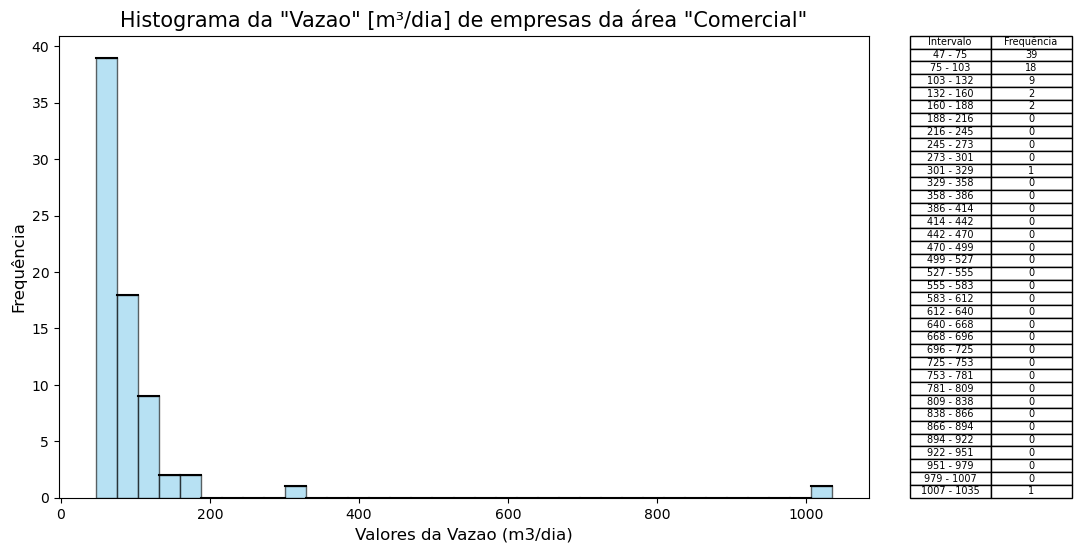

In [204]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Histograma con relleno
hist_data = ax.hist(df_comercial['100 MAIORES'], bins=35, color='skyblue', alpha=0.6, edgecolor='black')

# Agregar una línea de contorno al histograma
# Extraer los datos del histograma
counts, edges = hist_data[0], hist_data[1]

# Graficar la línea de contorno
for i in range(len(edges) - 1):
    ax.plot([edges[i], edges[i+1]], [counts[i], counts[i]], color='black', linewidth=1.5)

# Crear una tabla con los valores del histograma y redondear los números
table_data = pd.DataFrame({
    'Intervalo': [f'{x:.0f} - {y:.0f}' for x, y in zip(edges[:-1], edges[1:])],
    'Frequência': counts.astype(int)  # Convertir a entero para eliminar decimales
})

# Agregar la tabla al gráfico
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='right',
                  bbox=[1.05, 0, 0.2, 1])  # Ajusta bbox para posicionar la tabla

# Configurar el título y etiquetas del gráfico
ax.set_title('Histograma da "Vazao" [m³/dia] de empresas da área "Comercial"', fontsize=15)
ax.set_xlabel('Valores da Vazao (m3/dia)', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)

# Ajustar el diseño para que no se solapen
plt.subplots_adjust(right=0.8)

# Mostrar el gráfico y la tabla
plt.show()


## Actividad Industrial

As seguintes áreas representam os setores predominantes na nossa base de dados e estão sendo consideradas para o esquema de engenharia preliminar da planta. Essas categorias abrangem uma variedade de indústrias e processos que são contabilizados para avaliar a capacidade de tratamento e atendimento às demandas específicas:

1. **fabricação e montagem de veículos**
2. **siderúrgica**
3. **estação de tratamento de esgoto**
4. **indústria metalúrgica**
5. **tratamento de resíduos**
6. **matadouro**
7. **fabricação de vestuário/acessórios**
8. **indústria têxtil**
9. **indústria do papel e papelão**
10. **consumo industrial copasa**
11. **fábrica de isolantes térmicos e refratários**
12. **indústria de produtos farmacêuticos e veterinários**
13. **fabricação de produtos alimentares**
14. **indústria mecânica**
15. **indústria de auto peças**
16. **frigorífico/abatedouro**


### Estatísticas básicas para a área "Industrial"

In [173]:
# Import the Excel file
df_industrial = pd.read_excel('industrial.xlsx')
# Obtener el análisis descriptivo para una columna específica
analisis_columna = df_industrial['100 MAIORES'].describe()
print(analisis_columna)

count      21.000000
mean      202.742576
std       298.253627
min        51.768817
25%        60.225806
50%        85.387097
75%       172.236559
max      1322.795699
Name: 100 MAIORES, dtype: float64


###  Histograma da "Vazao" [m3/dia] de empresas da área "Industrial"

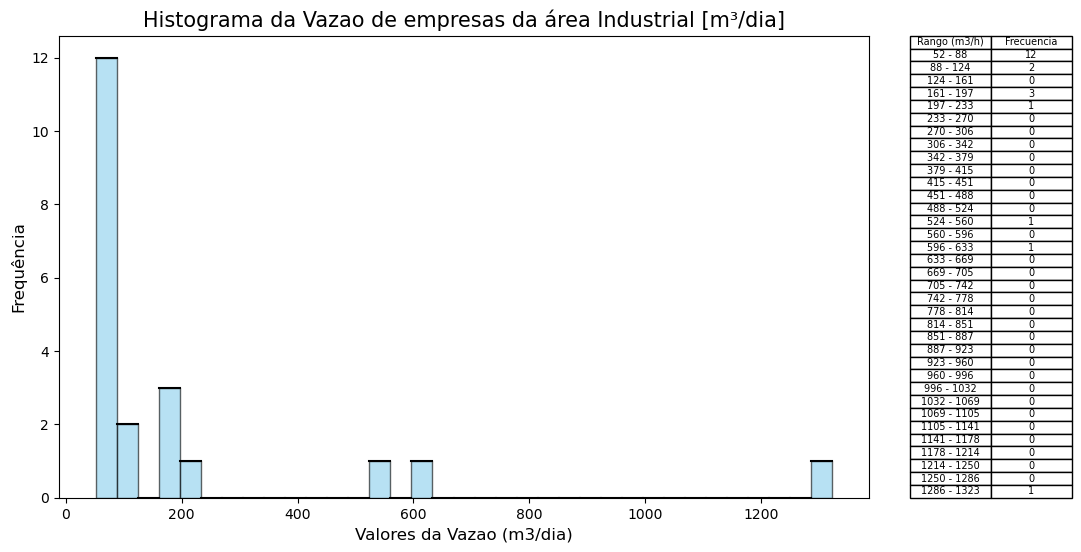

In [209]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Histograma con relleno
hist_data = ax.hist(df_industrial['100 MAIORES'], bins=35, color='skyblue', alpha=0.6, edgecolor='black')

# Extraer los datos del histograma
counts, edges = hist_data[0], hist_data[1]

# Graficar la línea de contorno
for i in range(len(edges) - 1):
    ax.plot([edges[i], edges[i+1]], [counts[i], counts[i]], color='black', linewidth=1.5)

# Crear una tabla con los valores del histograma y redondear los números
table_data = pd.DataFrame({
    'Intervalo': [f'{x:.0f} - {y:.0f}' for x, y in zip(edges[:-1], edges[1:])],
    'Frequência': counts.astype(int)  # Convertir a entero para eliminar decimales
})

table_data.columns = ['Rango (m3/h)', 'Frecuencia']

# Agregar la tabla al gráfico
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='right',
                  bbox=[1.05, 0, 0.2, 1])  # Ajusta bbox para posicionar la tabla

# Configurar el título y etiquetas del gráfico
ax.set_title('Histograma da Vazao de empresas da área Industrial [m³/dia]', fontsize=15)
ax.set_xlabel('Valores da Vazao (m3/dia)', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)

# Ajustar el diseño para que no se solapen
plt.subplots_adjust(right=0.8)

# Mostrar el gráfico y la tabla
plt.show()

# Análise geoestatística

### Importação de dados

In [175]:
# Ruta completa al shapefile
shapefile_path = r'D:\Consultorias\Consultoria COPASA\copasa\MG_Municipios_2022\MG_Municipios_2022.shp'
try:
    # Leer el shapefile
    gdf = gpd.read_file(shapefile_path)
    print("Shapefile leído correctamente.")
except Exception as e:
    print(f"Error al leer el shapefile: {e}")

Shapefile leído correctamente.


### Vazao por Municipio

No gráfico gerado, é apresentado um mapa temático que ilustra a distribuição do **total diário de vazão (m³/dia)** em diversos municípios do estado de Minas Gerais, Brasil. Os dados representados provêm de um shapefile que inclui informações geográficas e administrativas dos municípios da região. Cada município é representado por um polígono colorido de acordo com o valor de vazão, utilizando uma escala de cores que vai do amarelo (valores mais baixos) ao vermelho (valores mais altos). Isso permite identificar rapidamente as áreas com maiores e menores índices de vazão.

Adicionalmente, foi marcada a localização específica da "ETE Arrudas" com um ponto preto no mapa, acompanhado de uma etiqueta que indica seu nome e uma vazão simulada de 1000 m³/dia. Esta adição fornece um ponto de referência crucial no mapa e destaca a importância desta instalação dentro do contexto da distribuição geral de vazão na região.

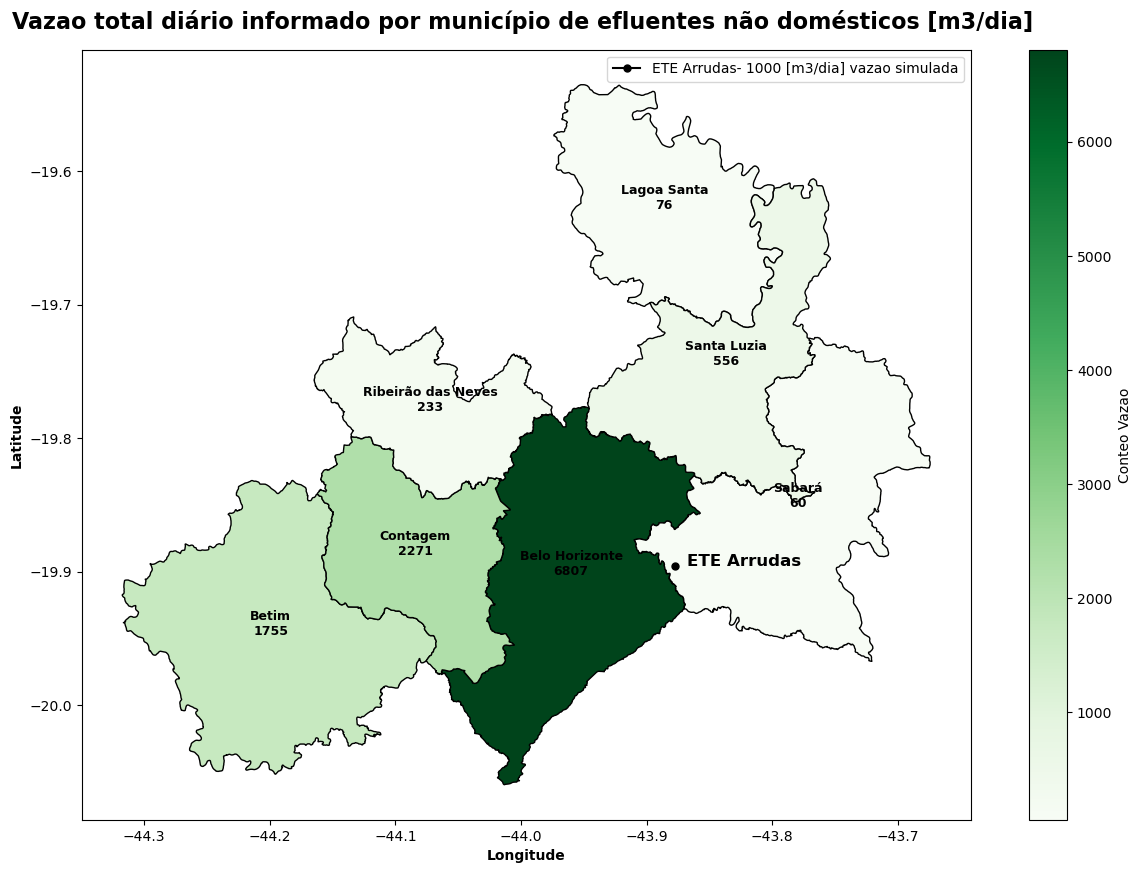

In [193]:
# Lista de municipios que queremos filtrar
categorias = ['Belo Horizonte', 'Contagem', 'Santa Luzia', 'Betim', 'Ribeirão das Neves', 'Lagoa Santa', 'Sabará']

# Valores de conteo vazao total
conteos_vazao = [211023, 70405, 17245, 54420, 7229, 2369, 1867]

# Dividir los valores de conteo vazao por 31 y redondear a enteros
conteos_vazao = [round(valor / 31) for valor in conteos_vazao]

# Filtrar el GeoDataFrame para solo incluir los municipios en la lista de categorías
gdf_filtrado = gdf[gdf['NM_MUN'].isin(categorias)]


# Crear un diccionario para mapear cada municipio a un conteo
conteos_dict = dict(zip(categorias, conteos_vazao))

# Copiar el GeoDataFrame filtrado para evitar SettingWithCopyWarning
gdf_filtrado = gdf_filtrado.copy()

# Agregar una columna de conteos al GeoDataFrame
gdf_filtrado['conteo_vazao'] = gdf_filtrado['NM_MUN'].map(conteos_dict)

# Crear el heatmap usando la escala de colores
fig, ax = plt.subplots(figsize=(15, 10))

# Usar una paleta de colores para el heatmap

cmap = plt.get_cmap('Greens')


gdf_filtrado.plot(ax=ax, column='conteo_vazao', cmap=cmap, edgecolor='k', legend=True,
                  legend_kwds={'label': "Conteo Vazao",
                               'orientation': "vertical"})

# Añadir anotaciones con los nombres de los municipios y los valores de conteo vazao
for idx, row in gdf_filtrado.iterrows():
    # Obtener el centroide del polígono para la anotación
    x, y = row['geometry'].centroid.xy
    # Anotar el nombre del municipio y el valor de conteo vazao
    ax.text(x[0], y[0], f'{row["NM_MUN"]}\n{row["conteo_vazao"]:.0f}', 
            fontsize=9, ha='center', color='black', weight='bold')

# Coordenadas del punto a agregar
lat, lon = -19.89611924552319, -43.87757125704475

# Convertir coordenadas a un punto en el gráfico (ajustar si necesario el sistema de referencia)
ax.plot(lon, lat, marker='o', color='black', markersize=5, label='ETE Arrudas- 1000 [m3/dia] vazao simulada')  

# Añadir una anotación para el punto, moviéndola a la derecha
offset = 0.01  
ax.text(lon + offset, lat, 'ETE Arrudas', fontsize=12, ha='left', color='black', weight='bold')

# Añadir título en negrita con espacio mayor del cuerpo
plt.title('Vazao total diário informado por município de efluentes não domésticos [m3/dia] ', 
          fontsize=16, fontweight='bold', pad=15)

plt.xlabel('Longitude',fontsize=10, fontweight='bold')

plt.ylabel('Latitude',fontsize=10, fontweight='bold')

plt.legend(loc='best')

plt.show()

### Mapa por atividade industrial

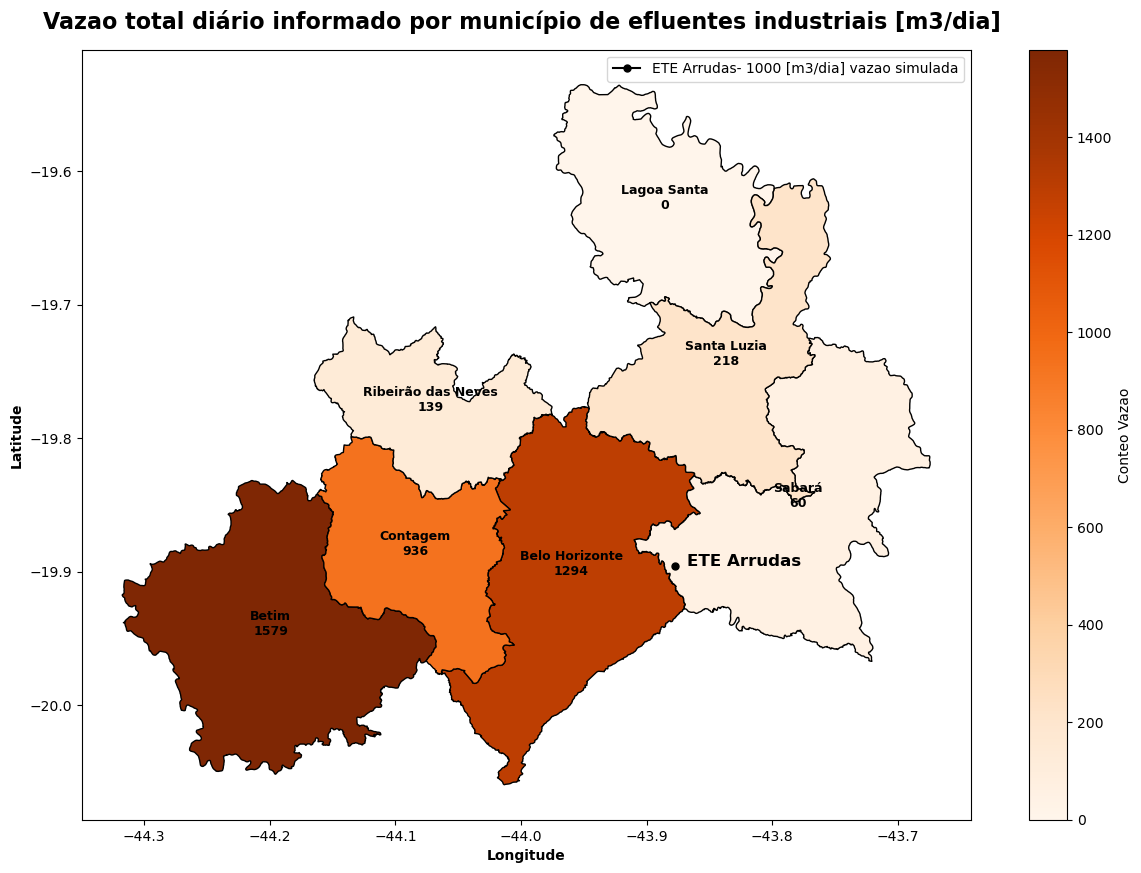

In [194]:
# Lista de municipios que queremos filtrar
categorias = ['Belo Horizonte', 'Contagem', 'Santa Luzia', 'Betim', 'Ribeirão das Neves', 'Lagoa Santa', 'Sabará']

# Valores de conteo vazao para cada municipio [m3/mes]
conteos_vazao = [40118, 29019, 6744, 48939, 4318, 0, 1867]

# Dividir los valores de conteo vazao por 31 y redondear a enteros
conteos_vazao = [round(valor / 31) for valor in conteos_vazao]


# Filtrar el GeoDataFrame para solo incluir los municipios en la lista de categorías
gdf_filtrado = gdf[gdf['NM_MUN'].isin(categorias)]

# Asegúrate de que el número de conteos_vazao coincida con el número de municipios únicos
if len(conteos_vazao) != len(gdf_filtrado):
    raise ValueError("El número de valores de conteo no coincide con el número de municipios filtrados.")

# Crear un diccionario para mapear cada municipio a un conteo
conteos_dict = dict(zip(categorias, conteos_vazao))

# Copiar el GeoDataFrame filtrado para evitar SettingWithCopyWarning
gdf_filtrado = gdf_filtrado.copy()

# Agregar una columna de conteos al GeoDataFrame
gdf_filtrado['conteo_vazao'] = gdf_filtrado['NM_MUN'].map(conteos_dict)

# Crear el heatmap usando la escala de colores
fig, ax = plt.subplots(figsize=(15, 10))

# Usar una paleta de colores para el heatmap
# Paleta de colores desde amarillo a rojo
#cmap = plt.get_cmap('YlOrRd')  
cmap = plt.get_cmap('Oranges')



gdf_filtrado.plot(ax=ax, column='conteo_vazao', cmap=cmap, edgecolor='k', legend=True,
                  legend_kwds={'label': "Conteo Vazao",
                               'orientation': "vertical"})

# Añadir anotaciones con los nombres de los municipios y los valores de conteo vazao
for idx, row in gdf_filtrado.iterrows():
    # Obtener el centroide del polígono para la anotación
    x, y = row['geometry'].centroid.xy
    # Anotar el nombre del municipio y el valor de conteo vazao
    ax.text(x[0], y[0], f'{row["NM_MUN"]}\n{row["conteo_vazao"]:.0f}', 
            fontsize=9, ha='center', color='black', weight='bold')

# Coordenadas del punto a agregar
lat, lon = -19.89611924552319, -43.87757125704475

# Convertir coordenadas a un punto en el gráfico (ajustar si necesario el sistema de referencia)
ax.plot(lon, lat, marker='o', color='black', markersize=5, label='ETE Arrudas- 1000 [m3/dia] vazao simulada')  

# Añadir una anotación para el punto, moviéndola a la derecha
offset = 0.01  
ax.text(lon + offset, lat, 'ETE Arrudas', fontsize=12, ha='left', color='black', weight='bold')

# Añadir título en negrita con espacio mayor del cuerpo
plt.title('Vazao total diário informado por município de efluentes industriais [m3/dia] ', 
          fontsize=16, fontweight='bold', pad=15)

plt.xlabel('Longitude',fontsize=10, fontweight='bold')

plt.ylabel('Latitude',fontsize=10, fontweight='bold')

plt.legend(loc='best')

plt.show()

### Mapa por atividade Comercial

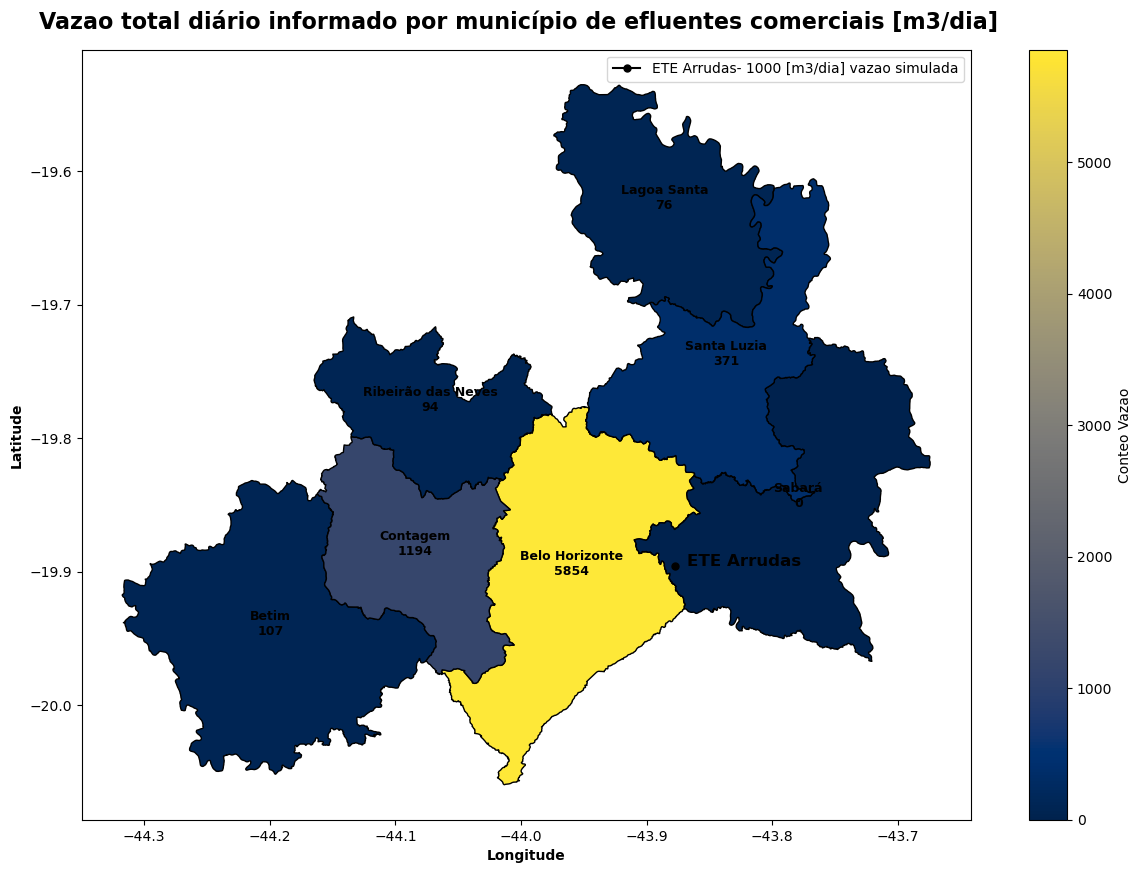

In [203]:
# Lista de municipios que queremos filtrar
categorias = ['Belo Horizonte', 'Contagem', 'Santa Luzia', 'Betim', 'Ribeirão das Neves', 'Lagoa Santa', 'Sabará']

# Valores de conteo vazao para cada municipio [m3/mes]
conteos_vazao = [181481, 37005, 11500, 3327, 2909, 2369, 0]

# Dividir los valores de conteo vazao por 31 y redondear a enteros
conteos_vazao = [round(valor / 31) for valor in conteos_vazao]

# Filtrar el GeoDataFrame para solo incluir los municipios en la lista de categorías
gdf_filtrado = gdf[gdf['NM_MUN'].isin(categorias)]

# Asegúrate de que el número de conteos_vazao coincida con el número de municipios únicos
if len(conteos_vazao) != len(gdf_filtrado):
    raise ValueError("El número de valores de conteo no coincide con el número de municipios filtrados.")

# Crear un diccionario para mapear cada municipio a un conteo
conteos_dict = dict(zip(categorias, conteos_vazao))

# Copiar el GeoDataFrame filtrado para evitar SettingWithCopyWarning
gdf_filtrado = gdf_filtrado.copy()

# Agregar una columna de conteos al GeoDataFrame
gdf_filtrado['conteo_vazao'] = gdf_filtrado['NM_MUN'].map(conteos_dict)

# Crear el heatmap usando la escala de colores
fig, ax = plt.subplots(figsize=(15, 10))


cmap = plt.get_cmap('cividis')




gdf_filtrado.plot(ax=ax, column='conteo_vazao', cmap=cmap, edgecolor='k', legend=True,
                  legend_kwds={'label': "Conteo Vazao",
                               'orientation': "vertical"})

# Añadir anotaciones con los nombres de los municipios y los valores de conteo vazao
for idx, row in gdf_filtrado.iterrows():
    # Obtener el centroide del polígono para la anotación
    x, y = row['geometry'].centroid.xy
    # Anotar el nombre del municipio y el valor de conteo vazao
    ax.text(x[0], y[0], f'{row["NM_MUN"]}\n{row["conteo_vazao"]:.0f}', 
            fontsize=9, ha='center', color='black', weight='bold')

# Coordenadas del punto a agregar
lat, lon = -19.89611924552319, -43.87757125704475

# Convertir coordenadas a un punto en el gráfico (ajustar si necesario el sistema de referencia)
ax.plot(lon, lat, marker='o', color='black', markersize=5, label='ETE Arrudas- 1000 [m3/dia] vazao simulada')  

# Añadir una anotación para el punto, moviéndola a la derecha
offset = 0.01  
ax.text(lon + offset, lat, 'ETE Arrudas', fontsize=12, ha='left', color='black', weight='bold')

# Añadir título en negrita con espacio mayor del cuerpo
plt.title('Vazao total diário informado por município de efluentes comerciais [m3/dia]  ', 
          fontsize=16, fontweight='bold', pad=15)

plt.xlabel('Longitude',fontsize=10, fontweight='bold')

plt.ylabel('Latitude',fontsize=10, fontweight='bold')

plt.legend(loc='best')

plt.show()